# Performance of Julia 
### Exemplary Problem: Numerical solution of logistic differential equation 
$\frac{\partial U(t)}{\partial t} = U(t)(1-U(t))$ 
 
Strategy: 
Transform into discrete sequence and calculate the single steps for sufficient small time steps $\Delta t$.

$U(t+\Delta t) =U(t)+ U(t)(1-U(t))\Delta t $

First step: Import neccesary packages

In [1]:
using Plots
using BenchmarkTools

Second step: Define function for discretisation with number of steps N as input argument

In [11]:
function julia_logistic(N)
    # Parameters
    T = 25.0
    u0 = 1e-5
    # Right hand side function
    f(U)= U*(1-U)
    # Discretization
    t = collect(LinRange(0.0,T,N))
    dt = t[2]-t[1]
    # Time stepping
    u = zeros(length(t))
    u[1] = u0
    for k = 1:(N-1)
        u[k+1] = u[k] + dt*f(u[k])
    end
    return(t,u)
end

julia_logistic (generic function with 1 method)

Third step: Visualize the problem, so see if everthing works as planned  

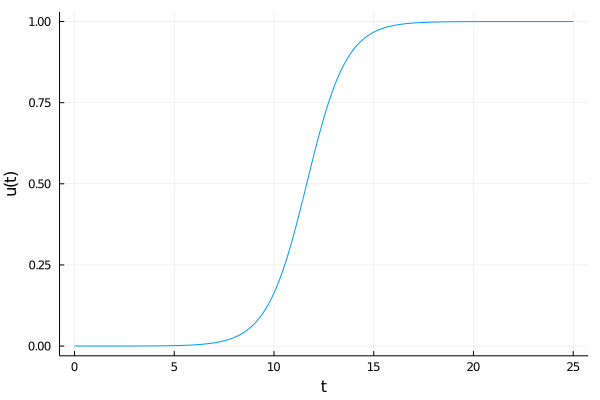

In [12]:
T,U = julia_logistic(1000)
plot(
    T,
    U, 
    xlabel = "t",
    ylabel ="u(t)",
    label ="",
    )

Fourth step: Benchmark the function 

In [14]:
@benchmark julia_logistic(1000)

BenchmarkTools.Trial: 
  memory estimate:  15.88 KiB
  allocs estimate:  2
  --------------
  minimum time:     5.017 μs (0.00% GC)
  median time:      5.550 μs (0.00% GC)
  mean time:        6.474 μs (7.48% GC)
  maximum time:     309.250 μs (97.87% GC)
  --------------
  samples:          10000
  evals/sample:     6

Fifth step: Realize that Julia is fast 